In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Tasks

### Loading all datasets

In [2]:
cases_test = pd.read_csv('./datasets/cases_2021_test.csv')
cases_location = pd.read_csv('./datasets/location_2021.csv')

## 1.1 Cleaning messy outcome labels
Datasets involved: cases_2021_train.csv

In [3]:
cases_train = pd.read_csv('./datasets/cases_2021_train.csv')

In [4]:
cases_train.groupby('outcome').size()

outcome
Alive                               127
Dead                                  9
Death                                 4
Deceased                           3361
Died                                  4
Discharged                            2
Discharged from hospital              3
Hospitalized                     135524
Receiving Treatment                 183
Recovered                         62875
Stable                               24
Under treatment                     243
critical condition                    1
death                                29
died                                624
discharge                           114
discharged                           82
recovered                          2435
recovering at home 03.03.2020         2
released from quarantine              3
stable                              107
stable condition                     90
dtype: int64

In [5]:
# labels_test = {
#     'hospitalized': {'Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition','discharge', 'discharged'},
#     'nonhospitalized': {'Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition'},
#     'deceased': {'Dead', 'Death', 'Deceased', 'Died', 'death', 'died'},
#     'recovered': {'Recovered', 'recovered'}
# }

### Mapping similar outcomes

In [6]:
labels = {
    'Discharged': 'hospitalized', 'Discharged from hospital': 'hospitalized', 'Hospitalized': 'hospitalized', 'critical condition': 'hospitalized', 'discharge': 'hospitalized', 'discharged': 'hospitalized', 
    'Alive': 'nonhospitalized', 'Receiving Treatment': 'nonhospitalized', 'Stable': 'nonhospitalized', 'Under treatment': 'nonhospitalized', 'recovering at home 03.03.2020': 'nonhospitalized', 'released from quarantine': 'nonhospitalized', 'stable': 'nonhospitalized', 'stable condition': 'nonhospitalized', 
    'Dead': 'deceased', 'Death': 'deceased', 'Deceased': 'deceased', 'Died': 'deceased', 'death': 'deceased', 'died': 'deceased',
     'Recovered': 'recovered', 'recovered': 'recovered'
}

In [7]:
cases_train['outcome_group'] = cases_train['outcome'].map(labels)

In [8]:
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,Hospitalized,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,Recovered,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,Hospitalized,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,Hospitalized,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,Hospitalized,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...
205841,NaN,NaN,Maharashtra,India,16.70446,74.24137,21.05.2020,NaN,NaN,False,Hospitalized,hospitalized
205842,NaN,NaN,Telangana,India,17.39487,78.47076,26.04.2020,NaN,https://twitter.com/Eatala_Rajender/status/125...,False,Hospitalized,hospitalized
205843,NaN,NaN,Maharashtra,India,19.20000,72.96667,22.05.2020,NaN,NaN,False,Recovered,recovered
205844,NaN,NaN,Maharashtra,India,18.94017,72.83483,24.05.2020,NaN,https://t.me/Allindiacovid/3814,False,Hospitalized,hospitalized


In [9]:
cases_train = cases_train.drop(columns=['outcome'])

In [10]:
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...
205841,NaN,NaN,Maharashtra,India,16.70446,74.24137,21.05.2020,NaN,NaN,False,hospitalized
205842,NaN,NaN,Telangana,India,17.39487,78.47076,26.04.2020,NaN,https://twitter.com/Eatala_Rajender/status/125...,False,hospitalized
205843,NaN,NaN,Maharashtra,India,19.20000,72.96667,22.05.2020,NaN,NaN,False,recovered
205844,NaN,NaN,Maharashtra,India,18.94017,72.83483,24.05.2020,NaN,https://t.me/Allindiacovid/3814,False,hospitalized


In [13]:
cases_train.groupby('outcome_group').size()

outcome_group
deceased             4031
hospitalized       135726
nonhospitalized       779
recovered           65310
dtype: int64

## 1.3 Exploratory Data Analysis 

Ideas to explore

Probably want to convert date_information to a datetime object 

Categorical Attributes: Province, Country, Chronic disease, outcome_group, Sex
Numerical: Age, Date
By: country, Age, Sex
Age range: 18 - 30, < 18, 60 >


### 1.3.1 train / test dataset

In [20]:
stats_cases_train = cases_train.describe(include='all')
stats_cases_train = stats_cases_train.append(pd.DataFrame([cases_train.isna().sum()], index=['null'])) # add count of null values
stats_cases_train = stats_cases_train.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
count,23053,25484,205242,205845,205846.0,205846.0,205795,12402,187452,205846,205846
null,182793,180362,604,1,0.0,0.0,51,193444,18394,0,0
unique,129,2,193,50,NaN,NaN,138,4519,2828,2,4


In [21]:
stats_cases_test = cases_test.describe(include='all').round(2)
stats_cases_test = stats_cases_test.append(pd.DataFrame([cases_test.isna().sum()], index=['null'])) # add count of null values
stats_cases_test = stats_cases_test.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_test

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
count,11374,12622,101091,101386,101387.0,101387.0,101364,6181,92227,101387,0.0
null,90013,88765,296,1,0.0,0.0,23,95206,9160,0,101387.0
unique,118,2,155,43,NaN,NaN,132,2438,2361,2,NaN


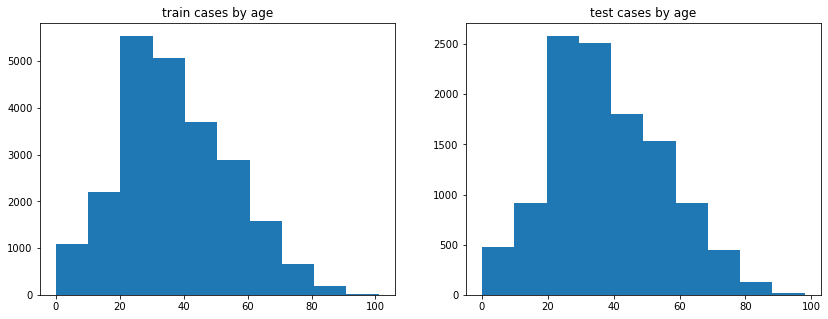

In [22]:
# age attribute
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(pd.to_numeric(cases_train['age'], errors='coerce'), bins=10)
plt.title('train cases by age')

plt.subplot(1,2,2)
plt.hist(pd.to_numeric(cases_test['age'], errors='coerce'), bins=10)
plt.title('test cases by age')
plt.show()

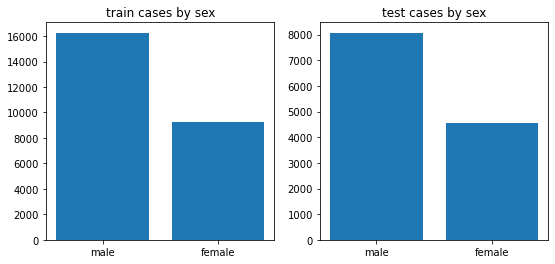

In [23]:
# sex attribute
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(cases_train['sex'].value_counts().index,cases_train['sex'].value_counts())
plt.title('train cases by sex')

plt.subplot(1,2,2)
plt.bar(cases_test['sex'].value_counts().index,cases_test['sex'].value_counts())
plt.title('test cases by sex')
plt.show()

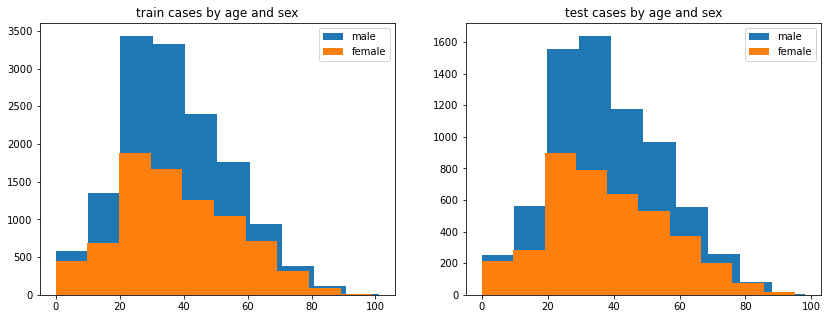

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
values = cases_train[['age', 'sex']]
plt.hist(pd.to_numeric(values.loc[values['sex']=='male', 'age'], errors='coerce'), bins=10)
plt.hist(pd.to_numeric(values.loc[values['sex']=='female', 'age'], errors='coerce'), bins=10)
plt.title('train cases by age and sex')
plt.legend(['male', 'female'])

plt.subplot(1,2,2)
values = cases_test[['age', 'sex']]
plt.hist(pd.to_numeric(values.loc[values['sex']=='male', 'age'], errors='coerce'), bins=10)
plt.hist(pd.to_numeric(values.loc[values['sex']=='female', 'age'], errors='coerce'), bins=10)
plt.title('test cases by age and sex')
plt.legend(['male', 'female'])
plt.show()

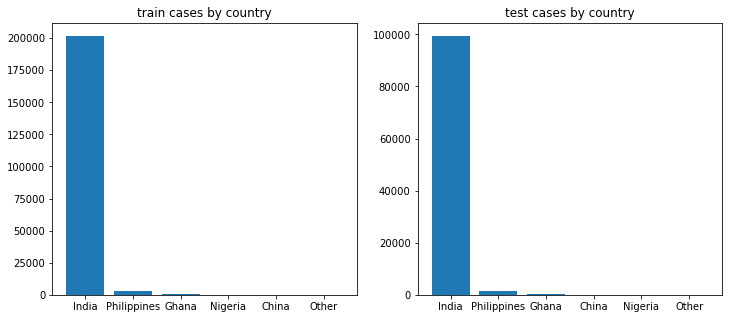

In [25]:
# country attribute
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
values = pd.DataFrame(cases_train['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>100 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('train cases by country')

plt.subplot(1,2,2)
values = pd.DataFrame(cases_test['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>60 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('test cases by country')
plt.show()

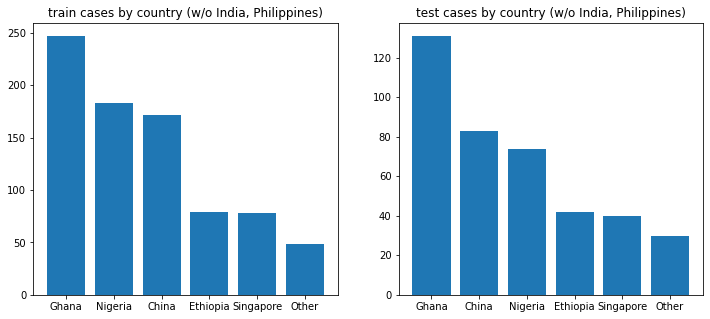

In [43]:
# country attribute
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
values = pd.DataFrame(cases_train['country'].value_counts()).reset_index()
values = values.drop(index=[0, 1])
values['index'] = values.apply(lambda x: x['index'] if x.country>60 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('train cases by country (w/o India, Philippines)')

plt.subplot(1,2,2)
values = pd.DataFrame(cases_test['country'].value_counts()).reset_index()
values = values.drop(index=[0, 1])
values['index'] = values.apply(lambda x: x['index'] if x.country>30 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('test cases by country (w/o India, Philippines)')
plt.show()

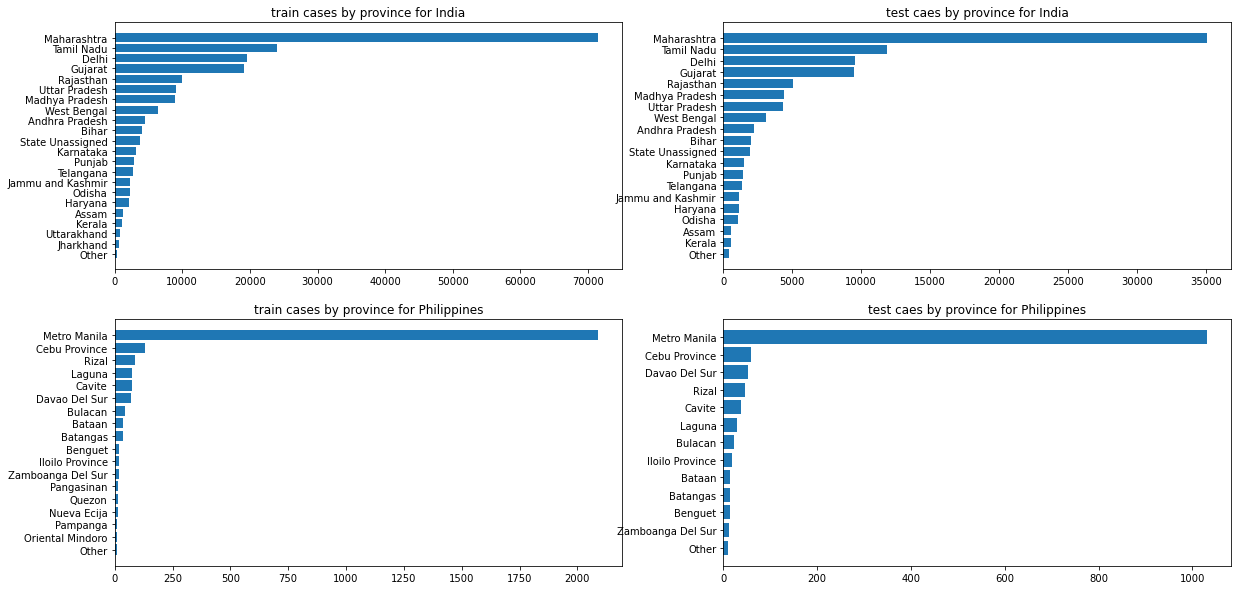

In [44]:
# province attribute
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
values = cases_train[cases_train['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('train cases by province for India')

plt.subplot(2,2,2)
values = cases_test[cases_test['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('test caes by province for India')

plt.subplot(2,2,3)
values = cases_train[cases_train['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('train cases by province for Philippines')

plt.subplot(2,2,4)
values = cases_test[cases_test['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('test caes by province for Philippines')

plt.show()

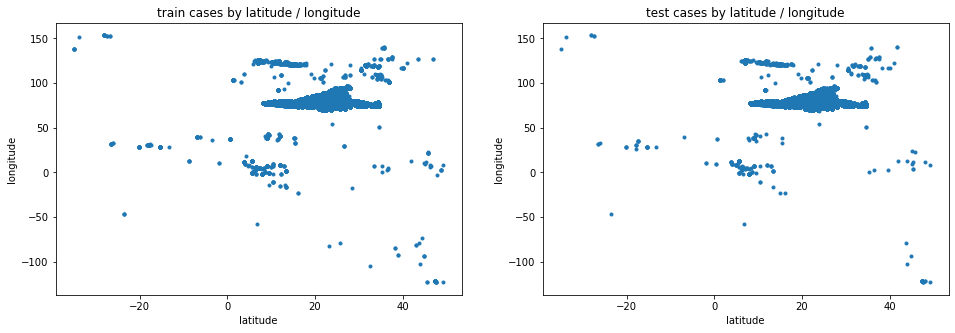

In [45]:
# latitude / longitude attribute
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(cases_train['latitude'], cases_train['longitude'], '.')
plt.title('train cases by latitude / longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.subplot(1,2,2)
plt.plot(cases_test['latitude'], cases_test['longitude'], '.')
plt.title('test cases by latitude / longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

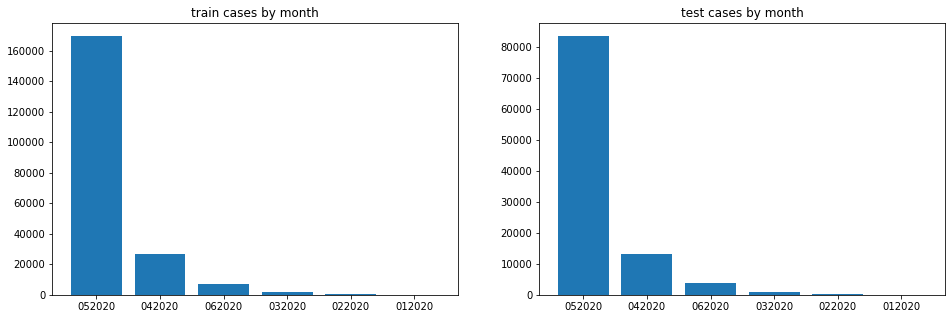

In [46]:
# date_confirmation attribute

# add month attribute
cases_train['month'] = cases_train.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_train = cases_train.replace("", np.NaN)
cases_test['month'] = cases_test.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_test = cases_test.replace("", np.NaN)


plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.bar(cases_train['month'].value_counts().index, cases_train['month'].value_counts())
plt.title('train cases by month')

plt.subplot(1,2,2)
plt.bar(cases_test['month'].value_counts().index, cases_test['month'].value_counts())
plt.title('test cases by month')
plt.show()

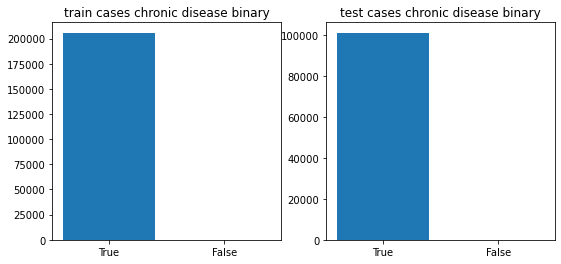

In [47]:
# chronic disease  attribute
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(['True','False'],cases_train['chronic_disease_binary'].value_counts())
plt.title('train cases chronic disease binary')

plt.subplot(1,2,2)
plt.bar(['True','False'],cases_test['chronic_disease_binary'].value_counts())
plt.title('test cases chronic disease binary')
plt.show()

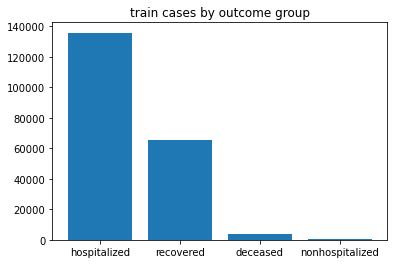

In [48]:
#outcome group attribute
plt.bar(cases_train['outcome_group'].value_counts().index,cases_train['outcome_group'].value_counts())
plt.title('train cases by outcome group')
plt.show()

### 1.3.2 location dataset

In [49]:
stats_cases_location = cases_location.describe(include="all").round(2)
stats_cases_location = stats_cases_location.append(pd.DataFrame([cases_location.isna().sum()], index=['null'])) # add count of null values
stats_cases_location = stats_cases_location.iloc[[0,11,1, 4, 5, 6, 10]] # keep [count, null, unique]
stats_cases_location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
count,3830,4004,4004,3915.00,3915.00,4004.00,4004.00,729.00,729.00,4004,3914.00,3956.00
null,174,0,0,89.00,89.00,0.00,0.00,3275.00,3275.00,0,90.00,48.00
unique,593,196,9,NaN,NaN,NaN,NaN,NaN,NaN,4004,NaN,NaN
mean,NaN,NaN,NaN,35.82,-71.33,32300.36,726.71,100300.81,36416.57,NaN,8171.70,2.75
std,NaN,NaN,NaN,13.23,54.89,166884.39,4083.39,274010.22,218469.87,NaN,3915.61,42.19
min,NaN,NaN,NaN,-52.37,-178.12,0.00,0.00,0.00,0.00,NaN,0.00,0.00
max,NaN,NaN,NaN,71.71,178.06,4611392.00,111489.00,3014226.00,4251829.00,NaN,35307.70,2648.84


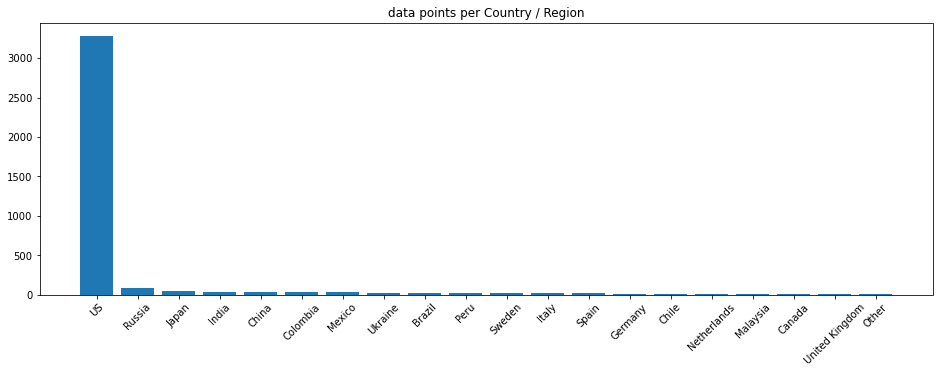

In [50]:
# country / region attribute
plt.figure(figsize=(16,5))
values = pd.DataFrame(cases_location['Country_Region'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x['Country_Region']>15 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['Country_Region'])
plt.title('data points per Country / Region')
plt.xticks(rotation=45)
plt.show()

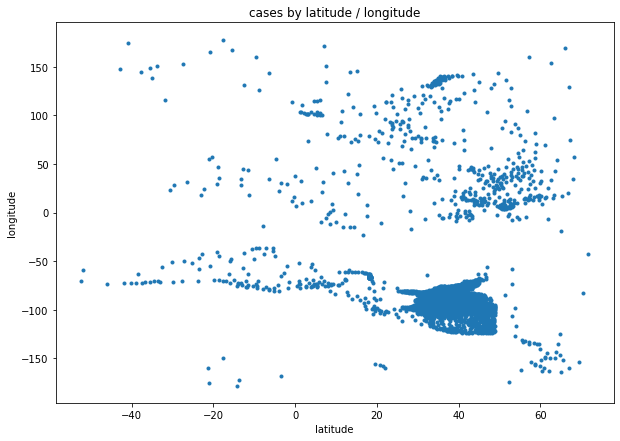

In [58]:
# latitude / longitude attribute
plt.figure(figsize=(10,7))
plt.plot(cases_location['Lat'], cases_location['Long_'], '.')
plt.title('cases by latitude / longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

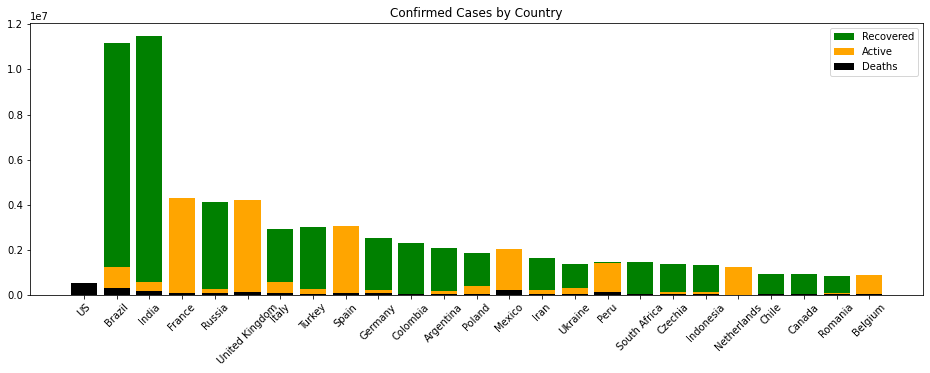

In [39]:
# confirmed, recovered, active, deaths attribute
values = cases_location.groupby('Country_Region').sum()
values = values.nlargest(25, 'Confirmed')

plt.figure(figsize=(16,5))
plt.bar(values.index, values['Recovered'], color='green')
plt.bar(values.index, values['Active'], color='orange')
plt.bar(values.index, values['Deaths'],  color='black')
plt.xticks(rotation=45)
plt.legend(['Recovered', 'Active', 'Deaths'])
plt.title('Confirmed Cases by Country')
plt.show()

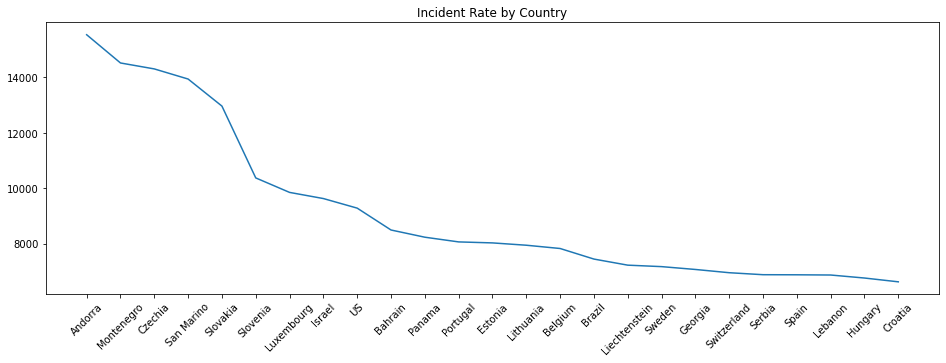

In [40]:
# incident rate attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Incident_Rate')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Incident_Rate'])
plt.xticks(rotation=45)
plt.title('Incident Rate by Country')
plt.show()

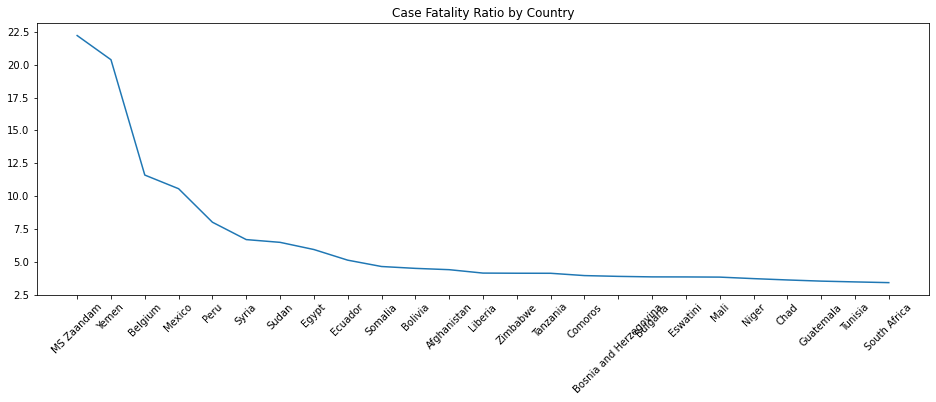

In [41]:
# case_fatality attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Case_Fatality_Ratio')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Case_Fatality_Ratio'])
plt.xticks(rotation=45)
plt.title('Case Fatality Ratio by Country')
plt.show()

## 1.4 Data Cleaning and Imputing Missing Values
Datasets involved: cases_2021_train.csv, cases_2021_test.csv, location_2021.csv

In [41]:
# Primary: age column -> remove all entries that are NaN
# format age to standard integer
# potential approaches: 

# other columns -> impute, what strategies can we use to impute missing values of different columns
# additional information: best action is replace NaN with ""

In [42]:
# Removing NaN's from age column in train and test datasets

cases_train = cases_train[cases_train['age'].notna()].reset_index()
cases_test = cases_test[cases_test['age'].notna()].reset_index()


In [108]:
# Strip all whitespace from 'age' columns
cases_train['age'] = cases_train['age'].str.strip()
cases_test['age'] = cases_test['age'].str.strip()

In [119]:
# age range greater than 10 should be removed?

# FIX: Remove empty spaces from 'age' column
# FOUND EDGE CASE: ['80', ''] -> 80 - 

def range_to_num(age):
    range = 10

    a_list = age.split('-')
    # print(a_list)

    if (a_list[0] == ''):
        return round(float(a_list[1]))
    elif ((len(a_list)) == 2 and (a_list[1] == '')):
        return round(float(a_list[0]))

    map_ints = map(float, a_list)
    map_list = list(map_ints)

    if (len(map_list) == 1):
        return round(map_list[0])  

    if ((map_list[1] - map_list[0]) > range):
        return 'remove'
    else:
        return round((map_list[1] + map_list[0]) / 2)


In [ ]:
cases_train = cases_train.drop(columns=['index'])
cases_test = cases_test.drop(columns=['index'])

In [47]:
# STEPS TO CLEAN VALUES IN AGE COLUMN
#1. Format all values with 'x-x' range to a single int value or 'remove'
#2. Remove all entries labelled 'remove' 
#3. Convert all column entries to int
#4. Use round() on all values to get rid of 0.3, 0.5, 0.8 values -> some babies

In [ ]:
# Cleaning train dataset - age

cases_train['age'] = cases_train['age'].apply(lambda x: range_to_num(x))
cases_train = cases_train[cases_train['age'] != 'remove']
cases_train['age'] = pd.to_numeric(cases_train['age'])
cases_train['age'] = cases_train['age'].apply(lambda x: round(x))

In [ ]:
# Cleaning test dataset - age

cases_test['age'] = cases_test['age'].apply(lambda x: range_to_num(x))
cases_test = cases_test[cases_test['age'] != 'remove']
cases_test['age'] = pd.to_numeric(cases_test['age'])
cases_test['age'] = cases_test['age'].apply(lambda x: round(x))

In [ ]:
# sex	province	country	latitude	longitude	date_confirmation	additional_information	source	chronic_disease_binary	outcome_group
# sex: NaN convert to 'unknown'
# province: can use latitude and longitude to get province -> need to find appropriate dataset / function to determine geographical location
# country: has no NaN values -> is okay
# date_confirmation: some NaN values -> think its okay to keep these entries -> convert NaN's to 'unknown'
# additional_information: some NaN values -> convert to 'unknown'
# source: some NaN values -> convert to 'unknown'
# chronic_disease_binary: no NaN values
# outcome_group: no NaN values



In [ ]:
cases_train[cases_train['outcome_group'].isna()]

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group


### 1.5 Dealing With Outliers

#### Ideas
- For the attributes in our dataset, not many could be determined outliers
- Age could be an outlier, if the majority of deceased are "older" and there is a few random "young" cases -> wouldn't want to remove these though
- Date_confirmation could be an outlier -> this could occur due to misinput and if the dates are way before Covid-19 was detected throughout the world, can remove the entry
- Source could be an attribute to use and remove entries -> if the entry has no source how can we "trust" that it is truthful/accurate

In [ ]:
cases_location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,2021-04-01 04:27:05,33.93911,67.709953,56454,2484,51550.0,2420.0,Afghanistan,145.020308,4.400043
1,NaN,Albania,2021-04-01 04:27:05,41.15330,20.168300,125157,2235,91271.0,31651.0,Albania,4349.051359,1.785757
2,NaN,Algeria,2021-04-01 04:27:05,28.03390,1.659600,117192,3093,81538.0,32561.0,Algeria,267.250200,2.639259
3,NaN,Andorra,2021-04-01 04:27:05,42.50630,1.521800,12010,115,11315.0,580.0,Andorra,15543.907332,0.957535
4,NaN,Angola,2021-04-01 04:27:05,-11.20270,17.873900,22311,537,20493.0,1281.0,Angola,67.884191,2.406884
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,W.P. Kuala Lumpur,Malaysia,2021-04-01 04:27:05,3.13900,101.686900,37819,118,36631.0,1070.0,"W.P. Kuala Lumpur, Malaysia",2126.574449,0.312012
4000,W.P. Labuan,Malaysia,2021-04-01 04:27:05,5.28310,115.230800,2327,12,2282.0,33.0,"W.P. Labuan, Malaysia",2341.046278,0.515685
4001,W.P. Putrajaya,Malaysia,2021-04-01 04:27:05,2.92640,101.696400,1142,8,1102.0,32.0,"W.P. Putrajaya, Malaysia",1083.491461,0.700525
4002,Unknown,Malaysia,2021-04-01 04:27:05,NaN,NaN,0,0,0.0,0.0,"Unknown, Malaysia",NaN,NaN


In [ ]:
cases_train[cases_train['country'].isna()]

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
